In [5]:
import numpy as np
import matplotlib.pyplot as plt
center_path = "/content/drive/MyDrive/Document/centers.csv"
data_path = "/content/drive/MyDrive/Document/data.csv"
print(center_path)

/content/drive/MyDrive/Document/centers.csv


In [6]:
from numpy import genfromtxt
my_data = genfromtxt(data_path, delimiter=',')
my_center = genfromtxt(center_path, delimiter=",")

my_data = list(my_data)
my_center = list(my_center)
print(my_center)

[array([ 4.45386085, 13.51890145]), array([2.09134574, 4.56649193]), array([ 0.06138072, 11.43613314]), array([11.01896904,  4.21701162]), array([9.38027437, 6.29622368]), array([6.83389489, 9.52920379])]


In [7]:
data_size = len(my_data)
center_size = len(my_center)
cluster_info = [-1]*data_size

while True:
  shifts = 0
  for S in range(len(my_data)):
    min = 99999999
    index = -1
    for C in range(len(my_center)):
      distance = (((my_center[C][0] - my_data[S][0])**2) + 
                        ((my_center[C][1] - my_data[S][1])**2))**0.5
      if distance < min:
        min = distance
        index = C
    if index == cluster_info[S]:
      continue
    else:
      cluster_info[S] = index
      shifts += 1
  if shifts < 10:
    break
  else:
    for C in range(len(my_center)):
      sum_x = 0
      sum_y = 0
      cluster_length = 0
      for a in range(len(cluster_info)):
        if cluster_info[a] == C:
          sum_x += my_data[a][0]
          sum_y += my_data[a][1]
          cluster_length += 1
      avg_x = sum_x/cluster_length
      avg_y = sum_y/cluster_length
      my_center[C][0] = avg_x
      my_center[C][1] = avg_y

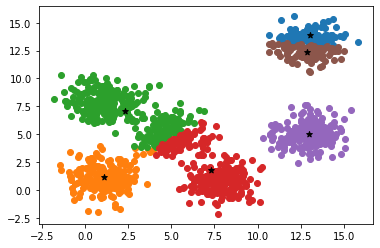

In [8]:
for a in range(len(my_center)):
  x = []
  y = []
  for i in range(len(cluster_info)):
    if cluster_info[i] == a:
      x.append(my_data[i][0])
      y.append(my_data[i][1])
  plt.scatter(x, y)

center_x = []
center_y = []
for cen in my_center:
  center_x.append(cen[0])
  center_y.append(cen[1])
plt.scatter(center_x, center_y, marker="*",c="black")

plt.show()